## **Renumeração dos profissionais de Data Science no Brasil**

O objetivo aqui é entender quais características dos profissionais de data science podem ter alguma relação com a remuneração. Vamos realizar análises referentes a renumeração e quais os fatores determinantes, como gênero, grau de escolaridade, tamanho da empresa e experiência profissional. 

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('datahackers-survey-2019-anonymous-responses.csv')

Inicialmente, vamos visualizar os 5 primeiros registros do dataframe.

In [ ]:
df.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')",...,"('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')"
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,...,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,...,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,...,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,...,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,NaN,Business Intelligence/Analista de BI
4,pj9mgud4d6mdct1l7vq0pj9mgu78h6ju,27.0,Masculino,1,NaN,1.0,Graduação/Bacharelado,Freelancer,de 6 a 10,1.0,...,0,Udemy,NaN,1.0,NaN,NaN,Computação / Engenharia de Software / Sistemas...,Internet/Ecommerce,"C-level (CDO, CIO, CTO)",NaN


Agora, veremos a dimensão do dataframe com o seguinte comando: 

In [ ]:
df.shape

(1765, 170)

O presente comando serve, principalmente, para determinar os tipos de objeto presentes no dataframe. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Columns: 170 entries, ('P0', 'id') to ('D6', 'anonymized_role')
dtypes: float64(5), int64(146), object(19)
memory usage: 2.3+ MB


Este comando serve para determinar a quantidade de dados nulos.

In [ ]:
df.isnull().sum()

('P0', 'id')                             0
('P1', 'age')                           24
('P2', 'gender')                         3
('P3', 'living_in_brasil')               0
('P5', 'living_state')                 337
                                      ... 
('D2', 'origin_macroregion')          1440
('D3', 'anonymized_degree_area')        35
('D4', 'anonymized_market_sector')     243
('D5', 'anonymized_manager_level')    1460
('D6', 'anonymized_role')              514
Length: 170, dtype: int64

Para verificar quão significativos são esses dados nulos, temos que determinar a média dos valores nulos existentes.

In [ ]:
df.isnull().mean()

('P0', 'id')                          0.000000
('P1', 'age')                         0.013598
('P2', 'gender')                      0.001700
('P3', 'living_in_brasil')            0.000000
('P5', 'living_state')                0.190935
                                        ...   
('D2', 'origin_macroregion')          0.815864
('D3', 'anonymized_degree_area')      0.019830
('D4', 'anonymized_market_sector')    0.137677
('D5', 'anonymized_manager_level')    0.827195
('D6', 'anonymized_role')             0.291218
Length: 170, dtype: float64

Os valores nulos, presentes no dataframe, naturalmente, são diferentes de zero, isto é:

In [ ]:
df.isnull().mean() != 0

('P0', 'id')                          False
('P1', 'age')                          True
('P2', 'gender')                       True
('P3', 'living_in_brasil')            False
('P5', 'living_state')                 True
                                      ...  
('D2', 'origin_macroregion')           True
('D3', 'anonymized_degree_area')       True
('D4', 'anonymized_market_sector')     True
('D5', 'anonymized_manager_level')     True
('D6', 'anonymized_role')              True
Length: 170, dtype: bool

Filtrando essa condição, temos:

In [ ]:
df.isnull().mean() [df.isnull().mean() !=0]

('P1', 'age')                                    0.013598
('P2', 'gender')                                 0.001700
('P5', 'living_state')                           0.190935
('P6', 'born_or_graduated')                      0.019263
('P12', 'workers_number')                        0.134844
('P13', 'manager')                               0.134844
('P16', 'salary_range')                          0.134844
('P22', 'most_used_proggraming_languages')       0.486686
('P29', 'have_data_warehouse')                   0.550708
('P35', 'data_science_plataforms_preference')    0.079320
('P35', 'other')                                 0.920680
('P36', 'draw_participation')                    0.002266
('D1', 'living_macroregion')                     0.190935
('D2', 'origin_macroregion')                     0.815864
('D3', 'anonymized_degree_area')                 0.019830
('D4', 'anonymized_market_sector')               0.137677
('D5', 'anonymized_manager_level')               0.827195
('D6', 'anonym

Agora, vamos ordenar esses valores:

In [ ]:
df.isnull().mean() [df.isnull().mean() !=0].sort_values()

('P2', 'gender')                                 0.001700
('P36', 'draw_participation')                    0.002266
('P1', 'age')                                    0.013598
('P6', 'born_or_graduated')                      0.019263
('D3', 'anonymized_degree_area')                 0.019830
('P35', 'data_science_plataforms_preference')    0.079320
('P12', 'workers_number')                        0.134844
('P13', 'manager')                               0.134844
('P16', 'salary_range')                          0.134844
('D4', 'anonymized_market_sector')               0.137677
('P5', 'living_state')                           0.190935
('D1', 'living_macroregion')                     0.190935
('D6', 'anonymized_role')                        0.291218
('P22', 'most_used_proggraming_languages')       0.486686
('P29', 'have_data_warehouse')                   0.550708
('D2', 'origin_macroregion')                     0.815864
('D5', 'anonymized_manager_level')               0.827195
('P35', 'other

Queremos computar, agora, as profissões da área de dados que fazem parte do rol de profissionais de dados no Brasil:

In [ ]:
df["('D6', 'anonymized_role')"].value_counts()

Desenvolvedor ou Engenheiro de Software    225
Outras                                     220
Data Scientist/Cientista de Dados          167
Data Analyst/Analista de Dados             163
Business Intelligence/Analista de BI       150
Data Engineer/Engenheiro de Dados          130
Business Analyst/Analista de Negócios       72
Analista de Inteligência de Mercado         29
Engenheiro                                  26
Analista de Marketing                       19
Engenheiro de Machine Learning              15
DBA/Administrador de Banco de Dados         14
Estatístico                                 11
Economista                                  10
Name: ('D6', 'anonymized_role'), dtype: int64

Para facilitar a leitura e apresentação dos dados, vamos agrupar e renomear essas profissões.

In [ ]:
df['profissao']= df["('D6', 'anonymized_role')"].map({'Desenvolvedor ou Engenheiro de Software':'Desenvolvedor/Engenheiro de Software',
                                                      'Outras':'Outras',
                                                      'Data Scientist/Cientista de Dados':'Cientista de Dados',
                                                      'Data Analyst/Analista de Dados':'Analista de Dados',
                                                      'Business Intelligence/Analista de BI':'Analista de BI',
                                                      'Data Engineer/Engenheiro de Dados':'Engenheiro de Dados', 
                                                      'Business Analyst/Analista de Negócios':'Analista de BI',
                                                      'Analista de Inteligência de Mercado':'Analista de BI',
                                                      'Engenheiro':'Outras',
                                                      'Analista de Marketing':'Outras',
                                                      'Engenheiro de Machine Learning':'Cientista de Dados',
                                                      'DBA/Administrador de Banco de Dados':'Engenheiro de Dados',
                                                      'Estatístico': 'Cientista de Dados',
                                                      'Economista':'Outras'})

Faremos agora a recontagem das profissões por conta dos novos nomes que foram atribuídos a elas.

In [ ]:
df['profissao'].value_counts()

Outras                                  275
Analista de BI                          251
Desenvolvedor/Engenheiro de Software    225
Cientista de Dados                      193
Analista de Dados                       163
Engenheiro de Dados                     144
Name: profissao, dtype: int64

Vamos visualizar isso num gráfico do tipo barras:

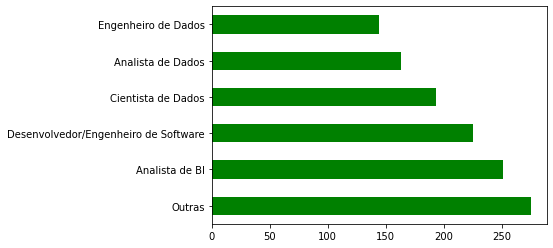

In [ ]:
df['profissao'].value_counts().plot(kind='barh', color='green')

O Engenheiro de dados é o profissional com menor quantidade no mercado, seguido pelo Analista de Dados, Cientista de Dados, Desenvolvedor/Engenheiro de Software, Analista de BI e 'outras'.
O maior valor em 'outras' ocorre porque foram agrupadas algumas profissões não mencionadas na pesquisa. A profissão de Engenheiro de dados se destaca visivelmente das outras profissões pois tem uma relação mais de organização dos dados, talvez por isso ela se encontra em menor quantidade no mercado. Por outro lado, grande parte das profissões de dados, são mais voltadas, em geral, para a análise dos dados. A profissão de Engenheiro de software, por ser mais antiga, possui grande quantidade de profissionais, mais do que o Engenheiro de dados, que é uma profissão mais recente que está em ascensão no mercado.

Abaixo, podemos visualizar a quantidade de pessoas inclusas em cada faixa salarial e seu respectivo gráfico:

In [ ]:
df["('P16', 'salary_range')"].value_counts()

de R$ 4.001/mês a R$ 6.000/mês      308
de R$ 8.001/mês a R$ 12.000/mês     237
de R$ 6.001/mês a R$ 8.000/mês      229
de R$ 3.001/mês a R$ 4.000/mês      219
de R$ 1.001/mês a R$ 2.000/mês      181
de R$ 2.001/mês a R$ 3000/mês       150
de R$ 12.001/mês a R$ 16.000/mês     82
Menos de R$ 1.000/mês                48
de R$ 16.001/mês a R$ 20.000/mês     45
de R$ 20.001/mês a R$ 25.000/mês     15
Acima de R$ 25.001/mês               13
Name: ('P16', 'salary_range'), dtype: int64

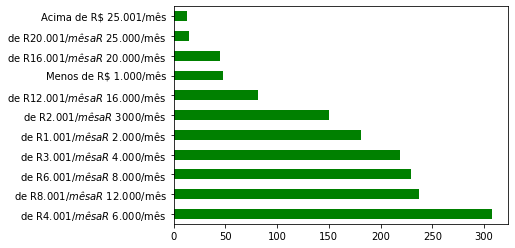

In [ ]:
df["('P16', 'salary_range')"].value_counts().plot(kind='barh', color='green')

A grande maioria ganha de 4.000 a 6.000/mês e uma pequena parcela possui salários acima de R$20.000. 

Aqui, temos os dados das idades dos entrevistados:

In [ ]:
df["('P1', 'age')"]

0       37.0
1       24.0
2       26.0
3       21.0
4       27.0
        ... 
1760    23.0
1761    39.0
1762    36.0
1763    29.0
1764    22.0
Name: ('P1', 'age'), Length: 1765, dtype: float64

Com o objetivo de trazer maior clareza na visualização dos dados, optou-se por criar o seguinte conjunto de variáveis:

In [ ]:
#Pré-processamento básico

#criando variáveis mais convenientes

#empresa
tammap = { 'de 1 a 5': 'Pequena',
           ' de 6 a 10': 'Pequena',
           'de 11 a 50': 'Pequena',
            'de 51 a 100': 'Pequena',
            'de 101 a 500': 'Média',
            'de 501 a 1000': 'Média',
            'de 1001 a 3000' :'Grande',
            'Acima de 3000': 'Grande'}

# salarios
salamap = { 'Menos de R$1.000/mês': 1000,
            ' de R$ 1.001/mês a R$ 2.000/mês': 1500,
           ' de 2.001/mês a R$ 3000/mês': 2500,
           'de R$ 3.001/mês a R$ 4.000/mês': 3500,
           'de R$ 4.001/mês a R$ 6.000/mês': 5000,
           'de R$ 6.001/mês a R$ 8.000/mês': 7000,
           'de R$ 8.001/mês a R$ 12.000/mês': 10000,
           'de R$ 12.001/mês a R$ 16.000/mês': 14000,
           'de R$ 16.001/mês a R$ 20.000/mês': 18000,
           'de R$ 20.001/mês a R$ 25.000/mês' : 22500,
           'Acima de R$ 25.001/mês': 25000}

#discretização das idades (escolha arbitrária dos cortes)
cortes = [0, 24, 30, 40, 100]
nomes = ['[18,24]', '[25,30]', '[31,40]', '[41,50]']

#criando um novo dataset com as informações de maior interesse

df['idade'] = pd.cut(df["('P1', 'age')"], bins=cortes, labels = nomes)

df['salario'] = df["('P16', 'salary_range')"].map(salamap)
df ['tamanho_da_empresa'] = df["('P12', 'workers_number')"].map(tammap)

df['gestor'] = df["('P13', 'manager')"].map({0:'não', 1: 'sim'})
df['se_considera_ds'] = df["('P19', 'is_data_science_professional')"].map ({0:'não', 1:'sim'})

df['sexo']=df["('P2', 'gender')"]
df['experiencia_ds']=df["('P17', 'time_experience_data_science')"]

df['tipo_de_trabalho']= df["('P10', 'job_situation')"]
df['escolaridade'] = df["('P8', 'degreee_level')"]

df['area_de_formacao'] = df["('D3', 'anonymized_degree_area')"]
df['setor_de_mercado'] = df["('D4', 'anonymized_market_sector')"]
df ['plataforma_favorita'] =df["('P35', 'data_science_plataforms_preference')"]

df.head()


          

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')",...,tamanho_da_empresa,gestor,se_considera_ds,sexo,experiencia_ds,tipo_de_trabalho,escolaridade,area_de_formacao,setor_de_mercado,plataforma_favorita
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,...,Pequena,não,não,Masculino,Não tenho experiência na área de dados,Empregado (CTL),Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Outras,Nunca fiz cursos online
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,...,Grande,não,sim,Feminino,Menos de 1 ano,Empregado (CTL),Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Educação,NaN
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,...,Grande,não,sim,Masculino,de 1 a 2 anos,Empregado (CTL),Graduação/Bacharelado,Outras Engenharias,Indústria (Manufatura),Udemy
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,...,Pequena,não,sim,Masculino,Menos de 1 ano,Estagiário,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,Alura
4,pj9mgud4d6mdct1l7vq0pj9mgu78h6ju,27.0,Masculino,1,NaN,1.0,Graduação/Bacharelado,Freelancer,de 6 a 10,1.0,...,NaN,sim,sim,Masculino,de 4 a 5 anos,Freelancer,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Internet/Ecommerce,Udemy


In [ ]:
df['salario'].mean()

7752.613240418118

Os dados foram agrupados pela categoria "profissão" e as médias dos atributos foram calculadas e disponibilizadas na tabela a seguir.

In [ ]:
df.groupby(['profissao']).mean()

,"('P1', 'age')","('P3', 'living_in_brasil')","('P6', 'born_or_graduated')","('P13', 'manager')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')",...,"('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P36', 'draw_participation')",salario
profissao,,,,,,,,,,,,,,,,,,,,,
Analista de BI,29.330645,0.996016,0.872000,0.035857,0.462151,0.187251,0.103586,0.023904,0.131474,0.055777,...,0.709163,0.191235,0.115538,0.155378,0.035857,0.163347,0.083665,0.187251,0.868526,6158.469945
Analista de Dados,28.840491,0.993865,0.839506,0.018405,0.803681,0.361963,0.300613,0.055215,0.276074,0.214724,...,0.742331,0.171779,0.134969,0.220859,0.036810,0.208589,0.061350,0.177914,0.833333,5856.589147
Cientista de Dados,28.182292,0.979275,0.677249,0.000000,0.963731,0.740933,0.673575,0.290155,0.652850,0.647668,...,0.663212,0.129534,0.300518,0.393782,0.046632,0.295337,0.056995,0.046632,0.699482,7936.708861
Desenvolvedor/Engenheiro de Software,29.153153,0.995556,0.812500,0.022222,0.262222,0.124444,0.071111,0.008889,0.120000,0.075556,...,0.591111,0.235556,0.137778,0.191111,0.031111,0.200000,0.088889,0.106667,0.861607,6955.172414
Engenheiro de Dados,29.157143,0.958333,0.818841,0.034722,0.680556,0.270833,0.145833,0.013889,0.180556,0.159722,...,0.673611,0.256944,0.104167,0.180556,0.034722,0.090278,0.097222,0.083333,0.868056,8831.967213
Outras,30.238806,0.985455,0.800738,0.025455,0.174545,0.080000,0.058182,0.003636,0.061818,0.043636,...,0.607273,0.138182,0.167273,0.163636,0.036364,0.127273,0.134545,0.152727,0.836364,7027.777778


Aqui foi feita a média dos salários dos profissionais de dados. O maior salário corresponde ao do Engenheiro de Dados e o menor, do Analista de dados.

In [ ]:
df.groupby(['profissao']).mean()['salario'].round(2)

profissao
Analista de BI                          6158.47
Analista de Dados                       5856.59
Cientista de Dados                      7936.71
Desenvolvedor/Engenheiro de Software    6955.17
Engenheiro de Dados                     8831.97
Outras                                  7027.78
Name: salario, dtype: float64

Abaixo, tem-se a média salarial por faixa etária. Quanto maior a idade, maior o salário. Tal fato pode ser relacionado aos anos de experiência, seu background. Quanto maior sua experiência, maior o salário. 





In [ ]:
df.groupby(['idade']).mean()['salario'].round(2)

idade
[18,24]     5141.22
[25,30]     6491.99
[31,40]     9053.15
[41,50]    10116.50
Name: salario, dtype: float64

Na tabela abaixo pode-se comprovar o que foi dito anteriormente.

In [ ]:
df.groupby(['experiencia_ds']).mean()['salario'].round(2)

experiencia_ds
Mais de 10 anos                           11125.00
Menos de 1 ano                             5929.69
Não tenho experiência na área de dados     6758.06
de 1 a 2 anos                              6334.84
de 2 a 3 anos                              6924.24
de 4 a 5 anos                              8826.92
de 6 a 10 anos                             9789.63
Name: salario, dtype: float64

In [ ]:
df_cds = df[df['profissao']=='Cientista de Dados']

In [ ]:
df_cds.groupby(['experiencia_ds']).mean()['salario'].round(2)

experiencia_ds
Mais de 10 anos                           12277.78
Menos de 1 ano                             5318.18
Não tenho experiência na área de dados         NaN
de 1 a 2 anos                              6042.55
de 2 a 3 anos                              6928.57
de 4 a 5 anos                             11340.00
de 6 a 10 anos                            12923.08
Name: salario, dtype: float64

Aqui temos a relação do salário com o sexo do profissional. Observa-se a desigualdade salarial entre homens e mulheres, infelizmente, tão comum ainda nos dias atuais. 




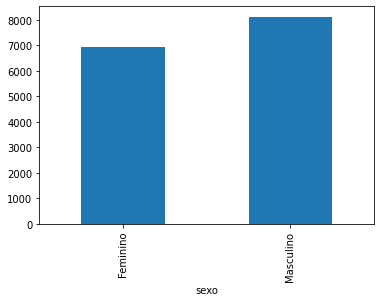

In [ ]:
df_cds.groupby(['sexo']).mean()['salario'].round(2).plot(kind='bar')

Aqui temos outro tipo de gráfico, para visualizar a quantidade total dos salários entre homens e mulheres. Nota-se que há uma diferença maior do que quando comparado à média desses salários.

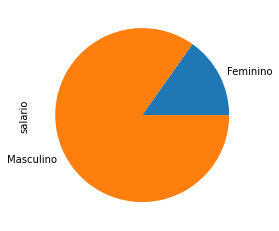

In [ ]:
df_cds.groupby(['sexo']).count()['salario'].round(2).plot(kind='pie')

Abaixo, tem-se relação do tamanho da empresa e o salário por gênero. A discrepância ocorre nos diferentes portes das empresas, mas ela ocorre em menor grau em empresas de grande porte. Tal fato pode ocorrer por haver maior visibilidade deste tipo de empresa no mercado. Empresas deste porte tendem a se comportar de maneira mais correta e de acordo com o que se espera de uma sociedade mais justa e igualitária, ou seja, equidade entre salários de homens e mulheres.

In [ ]:
df_cds.groupby(['tamanho_da_empresa', 'sexo']).mean()['salario'].round(2)

tamanho_da_empresa  sexo     
Grande              Feminino     8785.71
                    Masculino    8578.43
Média               Feminino     6833.33
                    Masculino    8843.75
Pequena             Feminino     4500.00
                    Masculino    6750.00
Name: salario, dtype: float64

In [ ]:
df_sexo_empresa=df_cds.groupby(['tamanho_da_empresa', 'sexo']).mean()['salario'].round(2).unstack()

Abaixo, tem-se os gráficos dos dados apresentados anteriormente:

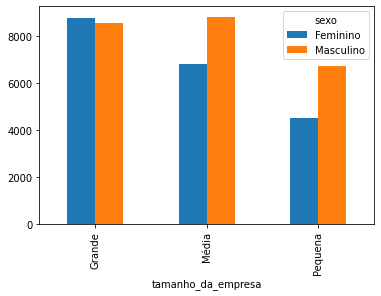

In [ ]:
df_cds.groupby(['tamanho_da_empresa', 'sexo']).mean()['salario'].round(2).unstack().plot(kind='bar')

Aqui também é possível observar que há uma discrepância maior entre o total dos salários e a média desses salários.

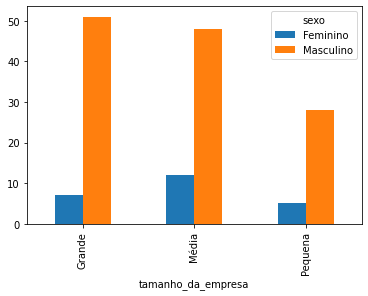

In [ ]:
df_cds.groupby(['tamanho_da_empresa', 'sexo']).count()['salario'].round(2).unstack().plot(kind='bar')

In [ ]:
df_cds.groupby(['tamanho_da_empresa', 'sexo']).count()['salario']

tamanho_da_empresa  sexo     
Grande              Feminino      7
                    Masculino    51
Média               Feminino     12
                    Masculino    48
Pequena             Feminino      5
                    Masculino    28
Name: salario, dtype: int64

In [ ]:
df_sexo_empresa

sexo,Feminino,Masculino
tamanho_da_empresa,,
Grande,8785.71,8578.43
Média,6833.33,8843.75
Pequena,4500.00,6750.00


In [ ]:
df_sexo_empresa['Feminino']

tamanho_da_empresa
Grande     8785.71
Média      6833.33
Pequena    4500.00
Name: Feminino, dtype: float64

Abaixo, tem-se o cálculo da proporção entre os salários de homens e mulheres. Como já comentado, nas empresas de grande porte a média salarial de ambos os gêneros foi similar e, sendo assim, a proporção é próxima de 1. Nas empresas de médio porte esse valor cai para 0,77 e de pequeno porte, para 0,67, o que mostra que quanto menor o porte da empresa, maior a discrepância nos salários.

In [ ]:
df_sexo_empresa['Proporção']=df_sexo_empresa['Feminino']/df_sexo_empresa['Masculino']

In [ ]:
df_sexo_empresa

sexo,Feminino,Masculino,Proporção
tamanho_da_empresa,,,
Grande,8785.71,8578.43,1.024163
Média,6833.33,8843.75,0.772673
Pequena,4500.00,6750.00,0.666667


Na tabela a seguir, tem-se o salário relacionado com o grau de escolaridade de cada indivíduo. Quanto mais anos de estudo, maior o salário, ou seja, um Phd tem o mais elevado salário e o graduando o valor mais baixo. Há ainda quem não tenha graduação formal, ou seja, não tem faculdade, e seu salário é superior a quem possui mestrado. Isso pode estar relacionado à experiência do profissional, uma vez que como já foi visualizado, o tempo de experiência no mercado é fator crucial para ter um salário maior.

In [ ]:
df_cds.groupby(['escolaridade']).mean()['salario'].round(2)

escolaridade
Doutorado ou Phd              13500.00
Estudante de Graduação         6291.67
Graduação/Bacharelado          6096.15
Mestrado                       8071.43
Não tenho graduação formal     8750.00
Pós-graduação                  9162.16
Name: salario, dtype: float64

Nesta tabela, tem-se a quantidade de pessoas com diferentes graus de instrução e as medidas estatísticas de média, desvio padrão, valor mínimo e máximo, 1°, 2° e 3° quartis. 
Nota-se que a grande maioria possui apenas graduação e apenas 4 pessoas não possuem estudo formal. Isso leva a crer que, apesar de apenas o fator estudo não influir no salário, mas também a experiência, é perceptível que é importante o profissional ter um curso superior para atuar no mercado, qualquer que seja sua formação. 

In [ ]:
df_cds.groupby(['escolaridade']).describe()['salario'].round(2)

,count,mean,std,min,25%,50%,75%,max
escolaridade,,,,,,,,
Doutorado ou Phd,11.0,13500.00,7221.50,5000.0,10000.0,10000.0,18250.0,25000.0
Estudante de Graduação,12.0,6291.67,5466.67,3500.0,3500.0,4250.0,5500.0,22500.0
Graduação/Bacharelado,52.0,6096.15,2948.98,3500.0,5000.0,5000.0,7000.0,18000.0
Mestrado,42.0,8071.43,3275.13,3500.0,5000.0,7000.0,10000.0,18000.0
Não tenho graduação formal,4.0,8750.00,6238.32,5000.0,5000.0,6000.0,9750.0,18000.0
Pós-graduação,37.0,9162.16,4573.56,3500.0,5000.0,7000.0,10000.0,22500.0


In [ ]:
df_cds[df_cds['escolaridade']=='Não tenho gradução formal']['salario']

Series([], Name: salario, dtype: float64)

98% dos Cientistas de dados utilizam o Python em suas análises. Já quando se fala de todas as categorias dos profissionais de dados, apenas 44 % utiliza esta linguagem de programação.

In [ ]:
df_cds["('P21', 'python')"].mean()

0.8963730569948186

In [ ]:
df["('P21', 'python')"].mean()

0.4441926345609065

Abaixo é possível observar as diferentes linguagens de programação utilizadas pelos profissionais de dados.

In [ ]:
df_cds.filter(regex='P21')

,"('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')","('P21', 'java')","('P21', 'julia')","('P21', 'sas_stata')","('P21', 'visual_basic_vba')","('P21', 'scala')","('P21', 'matlab')","('P21', 'php')","('P21', 'no_listed_languages')"
9,0,1,1,0,0,0,0,0,0,0,0,0,0
14,0,0,1,0,0,0,0,0,0,0,0,0,0
20,1,0,1,0,0,0,0,0,0,0,0,0,0
36,1,1,1,0,0,0,0,1,0,0,0,0,0
45,1,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,1,1,1,0,0,0,0,0,0,0,0,0,0
1737,1,0,1,0,0,0,0,0,0,1,0,0,0
1744,1,1,0,0,0,0,0,0,0,0,0,0,0
1754,1,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_cds.filter(regex='P21').mean().sort_values()

('P21', 'no_listed_languages')    0.000000
('P21', 'php')                    0.005181
('P21', 'dotnet')                 0.010363
('P21', 'julia')                  0.010363
('P21', 'matlab')                 0.025907
('P21', 'c_c++_c#')               0.031088
('P21', 'java')                   0.041451
('P21', 'visual_basic_vba')       0.051813
('P21', 'scala')                  0.082902
('P21', 'sas_stata')              0.088083
('P21', 'r')                      0.383420
('P21', 'sql_')                   0.730570
('P21', 'python')                 0.896373
dtype: float64

A linguagem mais utilizada pelos cientistas de dados é Python, seguida de SQL e R. A linguagem Julia, embora já esteja no mercado, ainda é pouco utilizada. 

In [ ]:
df_cds.filter(regex='P21').mean().sort_values(ascending=False)

('P21', 'python')                 0.896373
('P21', 'sql_')                   0.730570
('P21', 'r')                      0.383420
('P21', 'sas_stata')              0.088083
('P21', 'scala')                  0.082902
('P21', 'visual_basic_vba')       0.051813
('P21', 'java')                   0.041451
('P21', 'c_c++_c#')               0.031088
('P21', 'matlab')                 0.025907
('P21', 'dotnet')                 0.010363
('P21', 'julia')                  0.010363
('P21', 'php')                    0.005181
('P21', 'no_listed_languages')    0.000000
dtype: float64

Abaixo tem-se a relação dos tipos de ferramentas utilizadas em Machine Learning. Regressão Linear é a mais utilizada, seguida por regressão logística e árvore de decisão. São análises mais simples de implementar e, provavelmente, por esse motivo sejam as que mais aparecem na pesquisa. São análises que fazem parte do cotidiano destes profissionais, em que é possível obter resultados satisfatórios, utilizando pouco tempo.

In [ ]:
df_cds.filter(regex='P20').mean().sort_values(ascending=False)

('P20', 'linear_regression')             0.740933
('P20', 'logistic_regression')           0.673575
('P20', 'decision_tree')                 0.652850
('P20', 'random_forest')                 0.647668
('P20', 'cluster_analysis')              0.601036
('P20', 'neural_networks')               0.461140
('P20', 'gradient_boosted_machines')     0.445596
('P20', 'ensemble')                      0.398964
('P20', 'nlp')                           0.352332
('P20', 'bayesian_inference')            0.321244
('P20', 'svms')                          0.305699
('P20', 'glms')                          0.290155
('P20', 'rnns')                          0.181347
('P20', 'longitudinal_data_analysis')    0.176166
('P20', 'cnns')                          0.165803
('P20', 'markov_chains')                 0.134715
('P20', 'survival_analysis')             0.134715
('P20', 'joint analysis')                0.067358
('P20', 'gans')                          0.046632
('P20', 'hmms')                          0.041451


Abaixo tem-se as ferramentas utilizadas por esses profissionais: Power BI, metabase e tableau estão entre as mais usadas.

In [ ]:
df_cds.filter(regex='P27').mean().sort_values(ascending=False)

('P27', 'microsoft_powerbi')               0.336788
('P27', 'no_bi_tool_at_work')              0.217617
('P27', 'metabase')                        0.186528
('P27', 'tableau')                         0.176166
('P27', 'google_data_studio')              0.134715
('P27', 'qlik_view_qlik_sense')            0.088083
('P27', 'only_excel_gsheets')              0.077720
('P27', 'other')                           0.077720
('P27', 'redash')                          0.041451
('P27', 'ibm_analytics_cognos')            0.025907
('P27', 'superset')                        0.020725
('P27', 'microstrategy')                   0.020725
('P27', 'looker')                          0.015544
('P27', 'sap_business_objects')            0.005181
('P27', 'oracle_business_intelligence')    0.005181
('P27', 'birst')                           0.000000
dtype: float64

In [ ]:
df_abi = df[df['profissao']=='Analista de BI']

Abaixo, tem-se as ferramentas mais utilizadas pelo profissional de BI. Power BI e Tableau são as mais usadas.

In [ ]:
df_abi.filter(regex='P27').mean().sort_values(ascending=False)

('P27', 'microsoft_powerbi')               0.274900
('P27', 'tableau')                         0.095618
('P27', 'qlik_view_qlik_sense')            0.083665
('P27', 'only_excel_gsheets')              0.079681
('P27', 'other')                           0.063745
('P27', 'metabase')                        0.051793
('P27', 'google_data_studio')              0.043825
('P27', 'microstrategy')                   0.027888
('P27', 'no_bi_tool_at_work')              0.027888
('P27', 'sap_business_objects')            0.023904
('P27', 'ibm_analytics_cognos')            0.019920
('P27', 'superset')                        0.011952
('P27', 'oracle_business_intelligence')    0.007968
('P27', 'looker')                          0.003984
('P27', 'redash')                          0.000000
('P27', 'birst')                           0.000000
dtype: float64

A seguir, os cursos/sites que os profissionais de BI mais utilizam: Udemy, Udacity e Coursera estão entre os mais acessados.

In [ ]:
df_abi.filter(regex='P34').mean().sort_values(ascending=False)

('P34', 'udemy')             0.709163
('P34', 'udacity')           0.270916
('P34', 'coursera')          0.250996
('P34', 'height')            0.191235
('P34', 'other')             0.187251
('P34', 'kaggle_learn')      0.163347
('P34', 'data_camp')         0.155378
('P34', 'edx')               0.115538
('P34', 'online_courses')    0.083665
('P34', 'data_quest')        0.035857
dtype: float64

A seguir, os cursos/sites que os cientistas de dados mais utilizam: Coursera, Udemy e DataCamp estão entre os mais acessados.

In [ ]:
df_cds["('P35\', \'data_science_plataforms_preference\')"].value_counts()

Coursera                   53
Udemy                      38
DataCamp                   33
Udacity                    32
Nunca fiz cursos online    13
edX                         7
Kaggle Learn                6
Alura                       3
DataQuest                   2
Name: ('P35', 'data_science_plataforms_preference'), dtype: int64

Conclusão: Com o conjunto de dados apresentado, há muitas análises possíveis de se fazer. Foram eleitas algumas a fim de se analisar, principalmente, o salário do profissional de dados no Brasil ,levando-se em conta a escolaridade, o gênero, a idade, o porte da empresa. 

Há outras análises possíveis de serem feitas com este conjunto de dados, como salários de acordo com a região do país que o profissional vive. 

Também pode ser feita uma análise preditiva desses salários e fazer um comparativo com o DataSet de 2021.